In [1]:
%matplotlib inline
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

#### 2.

In [2]:
df2 = pd.read_csv(r'Downloads/Data_and_description/Part_2.csv')

In [3]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df2.shape

(1599, 12)

In [5]:
df2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [43]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_leaf_nodes=55)

In [44]:
X = df2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = df2.quality

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25)

In [46]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=55,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

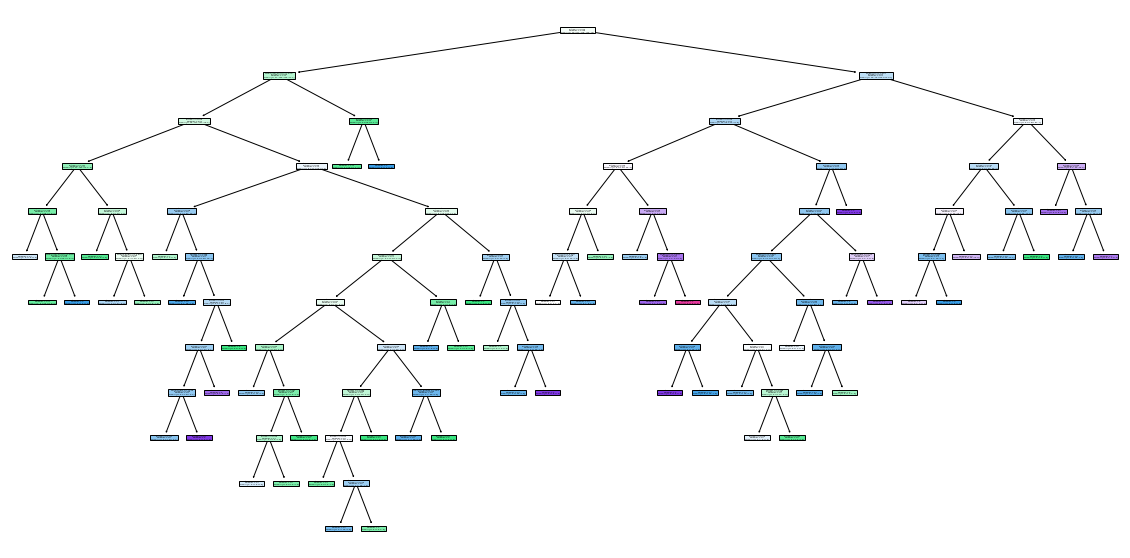

In [47]:
plt.rcParams["figure.figsize"] = (20, 10)
tree.plot_tree(clf, feature_names=list(X), filled=True);

In [48]:
predictions = clf.predict(X_test)

In [49]:
report = classification_report(y_test, predictions)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.08      0.09        13
           5       0.69      0.69      0.69       170
           6       0.60      0.65      0.62       160
           7       0.48      0.42      0.45        50
           8       0.00      0.00      0.00         5

    accuracy                           0.61       400
   macro avg       0.31      0.31      0.31       400
weighted avg       0.59      0.61      0.60       400



In [51]:
rfe = RFE(clf, 5)

In [52]:
fit = rfe.fit(X, y)

In [54]:
for i in range(len(list(fit.support_))):
    if fit.support_[i]:
        print(list(df2.columns)[i])

volatile acidity
residual sugar
total sulfur dioxide
sulphates
alcohol
